**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Machine Learning & Linear Regression

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## [ ] Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [5]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
AZ,5.208,18.6
AR,5.824,22.4
CA,3.360,12.0
CO,3.808,13.6
CT,3.888,10.8
DE,4.860,16.2
DC,1.593,5.9


## How do we compute a `LinearRegression` Model in Python?

### Import the Class

In [6]:
from sklearn.linear_model import LinearRegression

### Instantiate the Class

In [7]:
model_lr = LinearRegression()

### Fit the Model

In [8]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [9]:
features = df_crashes[["alcohol"]]
target = df_crashes["accidents"]

### Fit the Model Again

In [10]:
model_lr.fit(X=features,y=target)

LinearRegression()

### [ ] Predictions

#### Calculate the Predictions

In [13]:
pred = model_lr.predict(X=features)

#### Add a New Column with the Predictions

In [14]:
df_crashes["pred_lr"] = pred

In [15]:
df_crashes.head()

,alcohol,accidents,pred_lr
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
AZ,5.208,18.6,16.443069
AR,5.824,22.4,17.695093
CA,3.360,12.0,12.686997


### Model Visualization

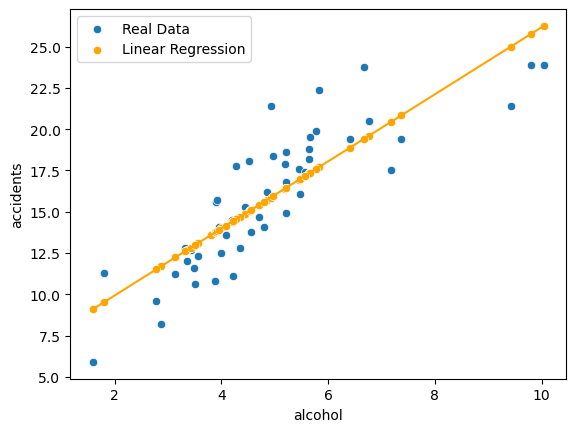

In [16]:
sns.scatterplot(x=df_crashes["alcohol"], y=df_crashes["accidents"], label="Real Data")
sns.scatterplot(x=df_crashes["alcohol"], y=df_crashes["pred_lr"], color="orange", label="Linear Regression")
sns.lineplot(x=df_crashes["alcohol"], y=df_crashes["pred_lr"], color="orange");

### [ ] Model's Score

#### Calculate the Score

In [17]:
model_lr.score(X=features, y=target)

0.7269492966665405

#### Explain the Score

##### Residuals

In [19]:
df_crashes["residuals"] = df_crashes.accidents - df_crashes.pred_lr

In [20]:
df_crashes.residuals.sum()

1.7053025658242404e-13

In [23]:
df_crashes.residuals.sum().round(2)

0.0

In [22]:
df_crashes["residuals2"] = df_crashes.residuals **2

In [30]:
RSS = df_crashes.residuals2.sum()

##### Target's Variation

In [29]:
TTS = ((df_crashes.accidents - df_crashes.accidents.mean())**2).sum()

##### The Ratio

In [33]:
1 - RSS / TTS

0.7269492966665405

In [35]:
model_lr.score(X=features,y=target)

0.7269492966665405

### [ ] Model Interpretation

In [36]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

In [37]:
model_lr.intercept_

5.8577761548263005

In [38]:
model_lr.coef_

array([2.0325063])

In [39]:
accidents = (5.85) + (2.03) * features

In [42]:
import pandas as pd

In [43]:
df_to_pred = pd.DataFrame({"alcohol" : [1,2,3,4,5]})

In [44]:
df_to_pred["pred"] = 5.85 + 2.03 * df_to_pred.alcohol

In [45]:
df_to_pred["increments"] = df_to_pred.pred.diff()

## [ ] Other Regression Models

### `RandomForestRegressor()` in Python

In [ ]:
from sklearn.ensemble import Rando

#### Fit the Model

#### Calculate Predictions

#### Model's Score

### `SVR()` in Python

#### Fit the Model

#### Calculate Predictions

#### Model's Score

## Which One Is the Best? Why?

## [ ] Visualize the 3 Models

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.